<a href="https://colab.research.google.com/github/Chandutv0808/-ARITHMETIC-LOGIC-UNIT-ALU-/blob/main/Copy_of_Network_latency_estimation_from_bandwidth_utilization_and_packet_loss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Upload Dataset & Import Libraries

In [1]:
# Upload Dataset
from google.colab import files
uploaded = files.upload()

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Regression Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score


Saving network_latency_cleaned.csv to network_latency_cleaned.csv


Load Dataset

In [2]:
df = pd.read_csv("network_latency_cleaned.csv")

print("Dataset Loaded Successfully")
print(df.head())


Dataset Loaded Successfully
   bandwidth_utilization_percent  packet_loss_percent  distance_km  \
0                      64.831385             1.785023  3310.074118   
1                      96.509581             1.523325   391.433341   
2                      88.456277             0.347386   219.552935   
3                      39.301507             1.270075   672.746393   
4                      67.029470             0.711405  4916.293519   

   network_type  protocol  routing_hops  congestion_level  time_of_day  \
0             3         1           7.0                 2            0   
1             0         0          14.0                 2            2   
2             0         0          11.0                 2            0   
3             1         0          12.0                 1            1   
4             1         1           4.0                 0            1   

   hardware_age_years  security_overhead  data_packet_size_bytes  \
0            5.059277                 

In [3]:
df.shape

(1000, 14)

In [4]:
df.head()

,bandwidth_utilization_percent,packet_loss_percent,distance_km,network_type,protocol,routing_hops,congestion_level,time_of_day,hardware_age_years,security_overhead,data_packet_size_bytes,network_traffic_type,wireless_signal_strength,latency_ms
0,64.831385,1.785023,3310.074118,3,1,7.0,2,0,5.059277,1,608.503212,1,2,57.649074
1,96.509581,1.523325,391.433341,0,0,14.0,2,2,6.365721,0,1395.966108,0,3,218.306544
2,88.456277,0.347386,219.552935,0,0,11.0,2,0,6.883723,0,870.014235,1,3,142.705963
3,39.301507,1.270075,672.746393,1,0,12.0,1,1,3.678932,0,202.249005,3,1,99.286409
4,67.029470,0.711405,4916.293519,1,1,4.0,0,1,0.835451,0,776.144641,1,1,58.843374


In [5]:
df.isna().sum()

,0
bandwidth_utilization_percent,0
packet_loss_percent,0
distance_km,0
network_type,0
protocol,0
routing_hops,0
congestion_level,0
time_of_day,0
hardware_age_years,0
security_overhead,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   bandwidth_utilization_percent  1000 non-null   float64
 1   packet_loss_percent            1000 non-null   float64
 2   distance_km                    1000 non-null   float64
 3   network_type                   1000 non-null   int64  
 4   protocol                       1000 non-null   int64  
 5   routing_hops                   1000 non-null   float64
 6   congestion_level               1000 non-null   int64  
 7   time_of_day                    1000 non-null   int64  
 8   hardware_age_years             1000 non-null   float64
 9   security_overhead              1000 non-null   int64  
 10  data_packet_size_bytes         1000 non-null   float64
 11  network_traffic_type           1000 non-null   int64  
 12  wireless_signal_strength       1000 non-null   in

In [7]:
df.describe()

,bandwidth_utilization_percent,packet_loss_percent,distance_km,network_type,protocol,routing_hops,congestion_level,time_of_day,hardware_age_years,security_overhead,data_packet_size_bytes,network_traffic_type,wireless_signal_strength,latency_ms
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,63.666933,0.992425,2533.718979,1.469000,1.33900,10.119000,0.915000,0.917000,3.775715,0.305000,780.746228,1.523000,1.472000,147.047874
std,19.588918,0.547109,1443.170871,1.093725,1.14516,5.428472,0.824897,0.831145,2.263451,0.460638,391.825518,1.084734,1.099284,81.673659
min,30.110914,0.000356,2.076469,0.000000,0.00000,1.000000,0.000000,0.000000,0.010499,0.000000,100.973329,0.000000,0.000000,5.233932
25%,46.712263,0.540510,1312.191508,1.000000,0.00000,6.000000,0.000000,0.000000,1.869664,0.000000,449.784184,1.000000,1.000000,78.849045
50%,63.393559,0.967691,2435.549362,1.000000,1.00000,10.000000,1.000000,1.000000,3.691242,0.000000,785.710453,2.000000,1.000000,142.705963
75%,79.970964,1.458582,3781.532883,2.000000,2.00000,15.000000,2.000000,2.000000,5.629822,1.000000,1096.858496,2.000000,2.000000,213.807877
max,98.930703,1.995741,4995.135906,3.000000,3.00000,19.000000,2.000000,2.000000,7.996642,1.000000,1498.491293,3.000000,3.000000,299.746717


Basic EDA

In [8]:
#missing values
print("\nMissing Values:\n",df.isnull().sum())


Missing Values:
 bandwidth_utilization_percent    0
packet_loss_percent              0
distance_km                      0
network_type                     0
protocol                         0
routing_hops                     0
congestion_level                 0
time_of_day                      0
hardware_age_years               0
security_overhead                0
data_packet_size_bytes           0
network_traffic_type             0
wireless_signal_strength         0
latency_ms                       0
dtype: int64


In [9]:
print("\nDataset Information")
print(df.info())

print("\nStatistical Summary")
print(df.describe())

print("\nMissing Values")
print(df.isnull().sum())



Dataset Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   bandwidth_utilization_percent  1000 non-null   float64
 1   packet_loss_percent            1000 non-null   float64
 2   distance_km                    1000 non-null   float64
 3   network_type                   1000 non-null   int64  
 4   protocol                       1000 non-null   int64  
 5   routing_hops                   1000 non-null   float64
 6   congestion_level               1000 non-null   int64  
 7   time_of_day                    1000 non-null   int64  
 8   hardware_age_years             1000 non-null   float64
 9   security_overhead              1000 non-null   int64  
 10  data_packet_size_bytes         1000 non-null   float64
 11  network_traffic_type           1000 non-null   int64  
 12  wireless_signal_strength    

In [10]:
#datatypes
print("\nData Types:\n",df.dtypes)


Data Types:
 bandwidth_utilization_percent    float64
packet_loss_percent              float64
distance_km                      float64
network_type                       int64
protocol                           int64
routing_hops                     float64
congestion_level                   int64
time_of_day                        int64
hardware_age_years               float64
security_overhead                  int64
data_packet_size_bytes           float64
network_traffic_type               int64
wireless_signal_strength           int64
latency_ms                       float64
dtype: object


Histogram Visualization

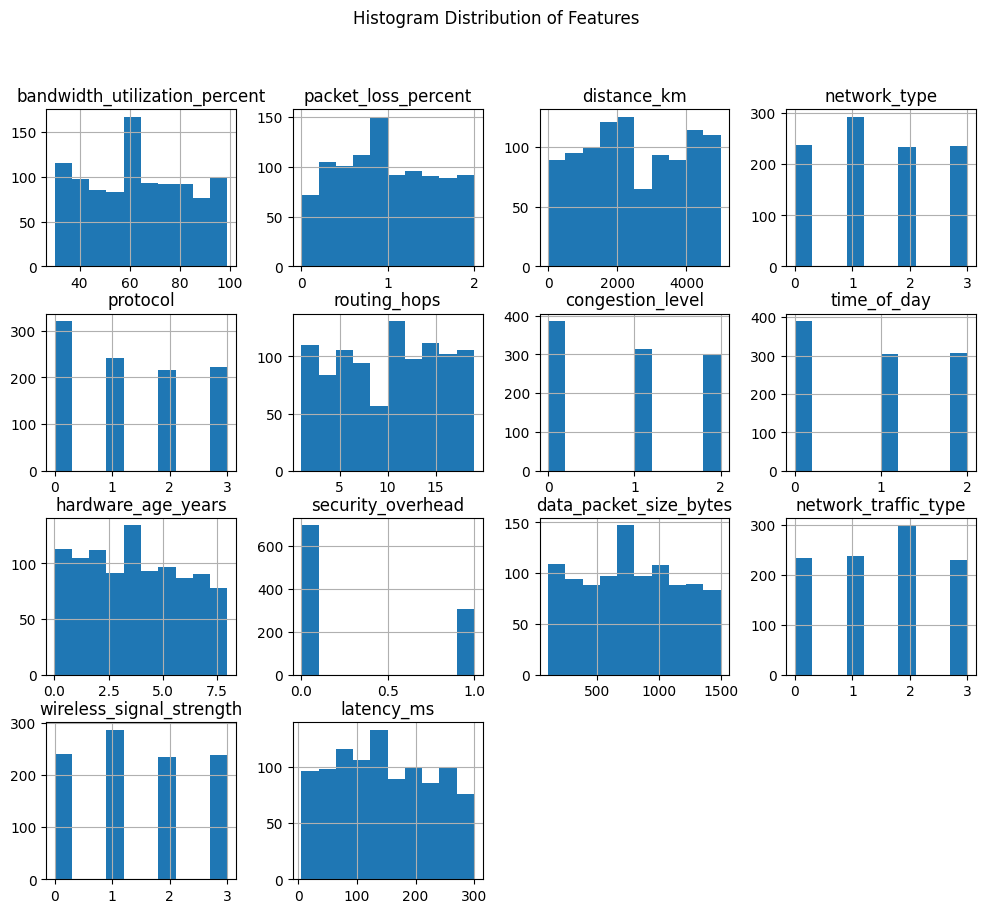

In [11]:
df.hist(figsize=(12,10))
plt.suptitle("Histogram Distribution of Features")
plt.show()


Scatter Plot Visualization

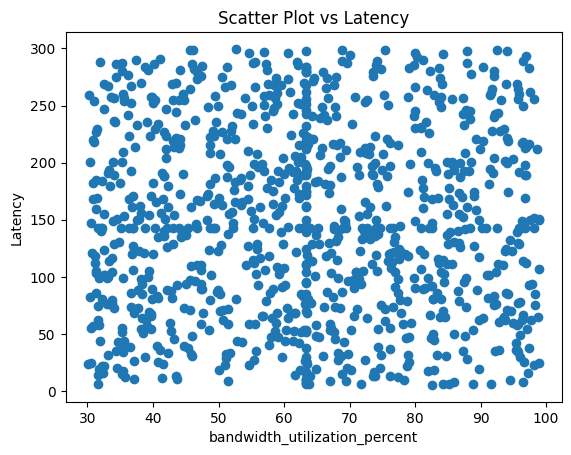

In [12]:
plt.figure()
plt.scatter(df.iloc[:,0], df["latency_ms"])
plt.xlabel(df.columns[0])
plt.ylabel("Latency")
plt.title("Scatter Plot vs Latency")
plt.show()


Correlation Heatmap

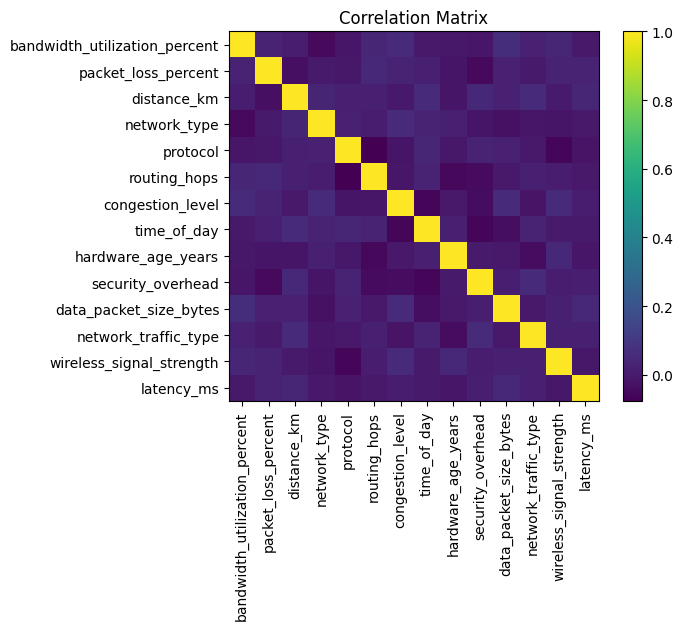

In [13]:
corr = df.corr()

plt.figure()
plt.imshow(corr)
plt.colorbar()

plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)

plt.title("Correlation Matrix")
plt.show()


Feature Selection & Scaling

In [14]:
X = df.drop(columns=["latency_ms"])
y = df["latency_ms"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Identify Column Types

In [15]:
categorical_cols=X.select_dtypes(include=['object']).columns
numerical_cols=X.select_dtypes(exclude=['object']).columns

Train Test Split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    random_state=42
)


Regression Models

In [17]:
print("\n========== REGRESSION MODELS ==========")

regressors = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42)
}

for name, model in regressors.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    print(f"\n{name}")
    print("R2:", r2_score(y_test, preds))
    print("MAE:", mean_absolute_error(y_test, preds))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, preds)))



========== REGRESSION MODELS ==========

Linear Regression
R2: -0.002087242549353663
MAE: 75.59872772431066
RMSE: 87.43156686850261

Decision Tree
R2: -1.0053349258980124
MAE: 100.4028701803746
RMSE: 123.68269897789428

Random Forest
R2: -0.05214717675430314
MAE: 77.71362314009575
RMSE: 89.58880464264008


Convert Regression to Classification

In [18]:
df["latency_class"] = pd.cut(
    df["latency_ms"],
    bins=[-1,20,50,1000],
    labels=[0,1,2]
)


Prepare Classification Data

In [19]:
X_cls = df.drop(columns=["latency_ms","latency_class"])
y_cls = df["latency_class"]

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_scaled,
    y_cls,
    test_size=0.2,
    random_state=42
)


Conventional Classification Models

In [20]:
print("\n========== CLASSIFICATION MODELS ==========")

classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "KNN Classifier": KNeighborsClassifier()
}

for name, model in classifiers.items():
    model.fit(X_train_c, y_train_c)
    preds = model.predict(X_test_c)

    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test_c, preds))



========== CLASSIFICATION MODELS ==========

Logistic Regression
Accuracy: 0.835

Decision Tree Classifier
Accuracy: 0.715

KNN Classifier
Accuracy: 0.815
